# PREDIKSI HARGA MINYAK CURAH UNTUK MENINGKATKAN KEUNTUNGAN DAN MENGURANGI KERUGIAN

### perhitungan manual LSTM
https://docs.google.com/spreadsheets/d/1mU8McgIlnW_rGjJQXjTY6Rpmtch7xCKh6rC0MkyZW6s/edit?usp=sharing

### link deploy model dengan pythonanywere
https://rekafferdi.pythonanywhere.com/



Tujuan

Penelitina ini bertujuan untuk mengetahui peningkatan atau penurunan harga pasar dalam 1 minggu kedepan agar suatu distibutor dapat mennggunakannnya untuk memprediksi harga kedepannya agar dapat meningkatkan pendapatan dan meminimalisir kerugian

# PEMBAHASAN

### 1. DATA UNDERSTANDING

### SUMBER DATA


Data diperoleh dari Bank Indonesia mengenai harga pangan dan dapat diakses dengan link berikut https://www.bi.go.id/hargapangan

#### EKSPLORASI DATA

#### Visualisasi Data


untuk memudahkan kita dalam memahami dataset ,ada baiknya kita ditampilkan dengan visual yang dapat dipahami oleh semua orang,pada visualisasi merupakan tahap awal kita dalam memahami dataset.

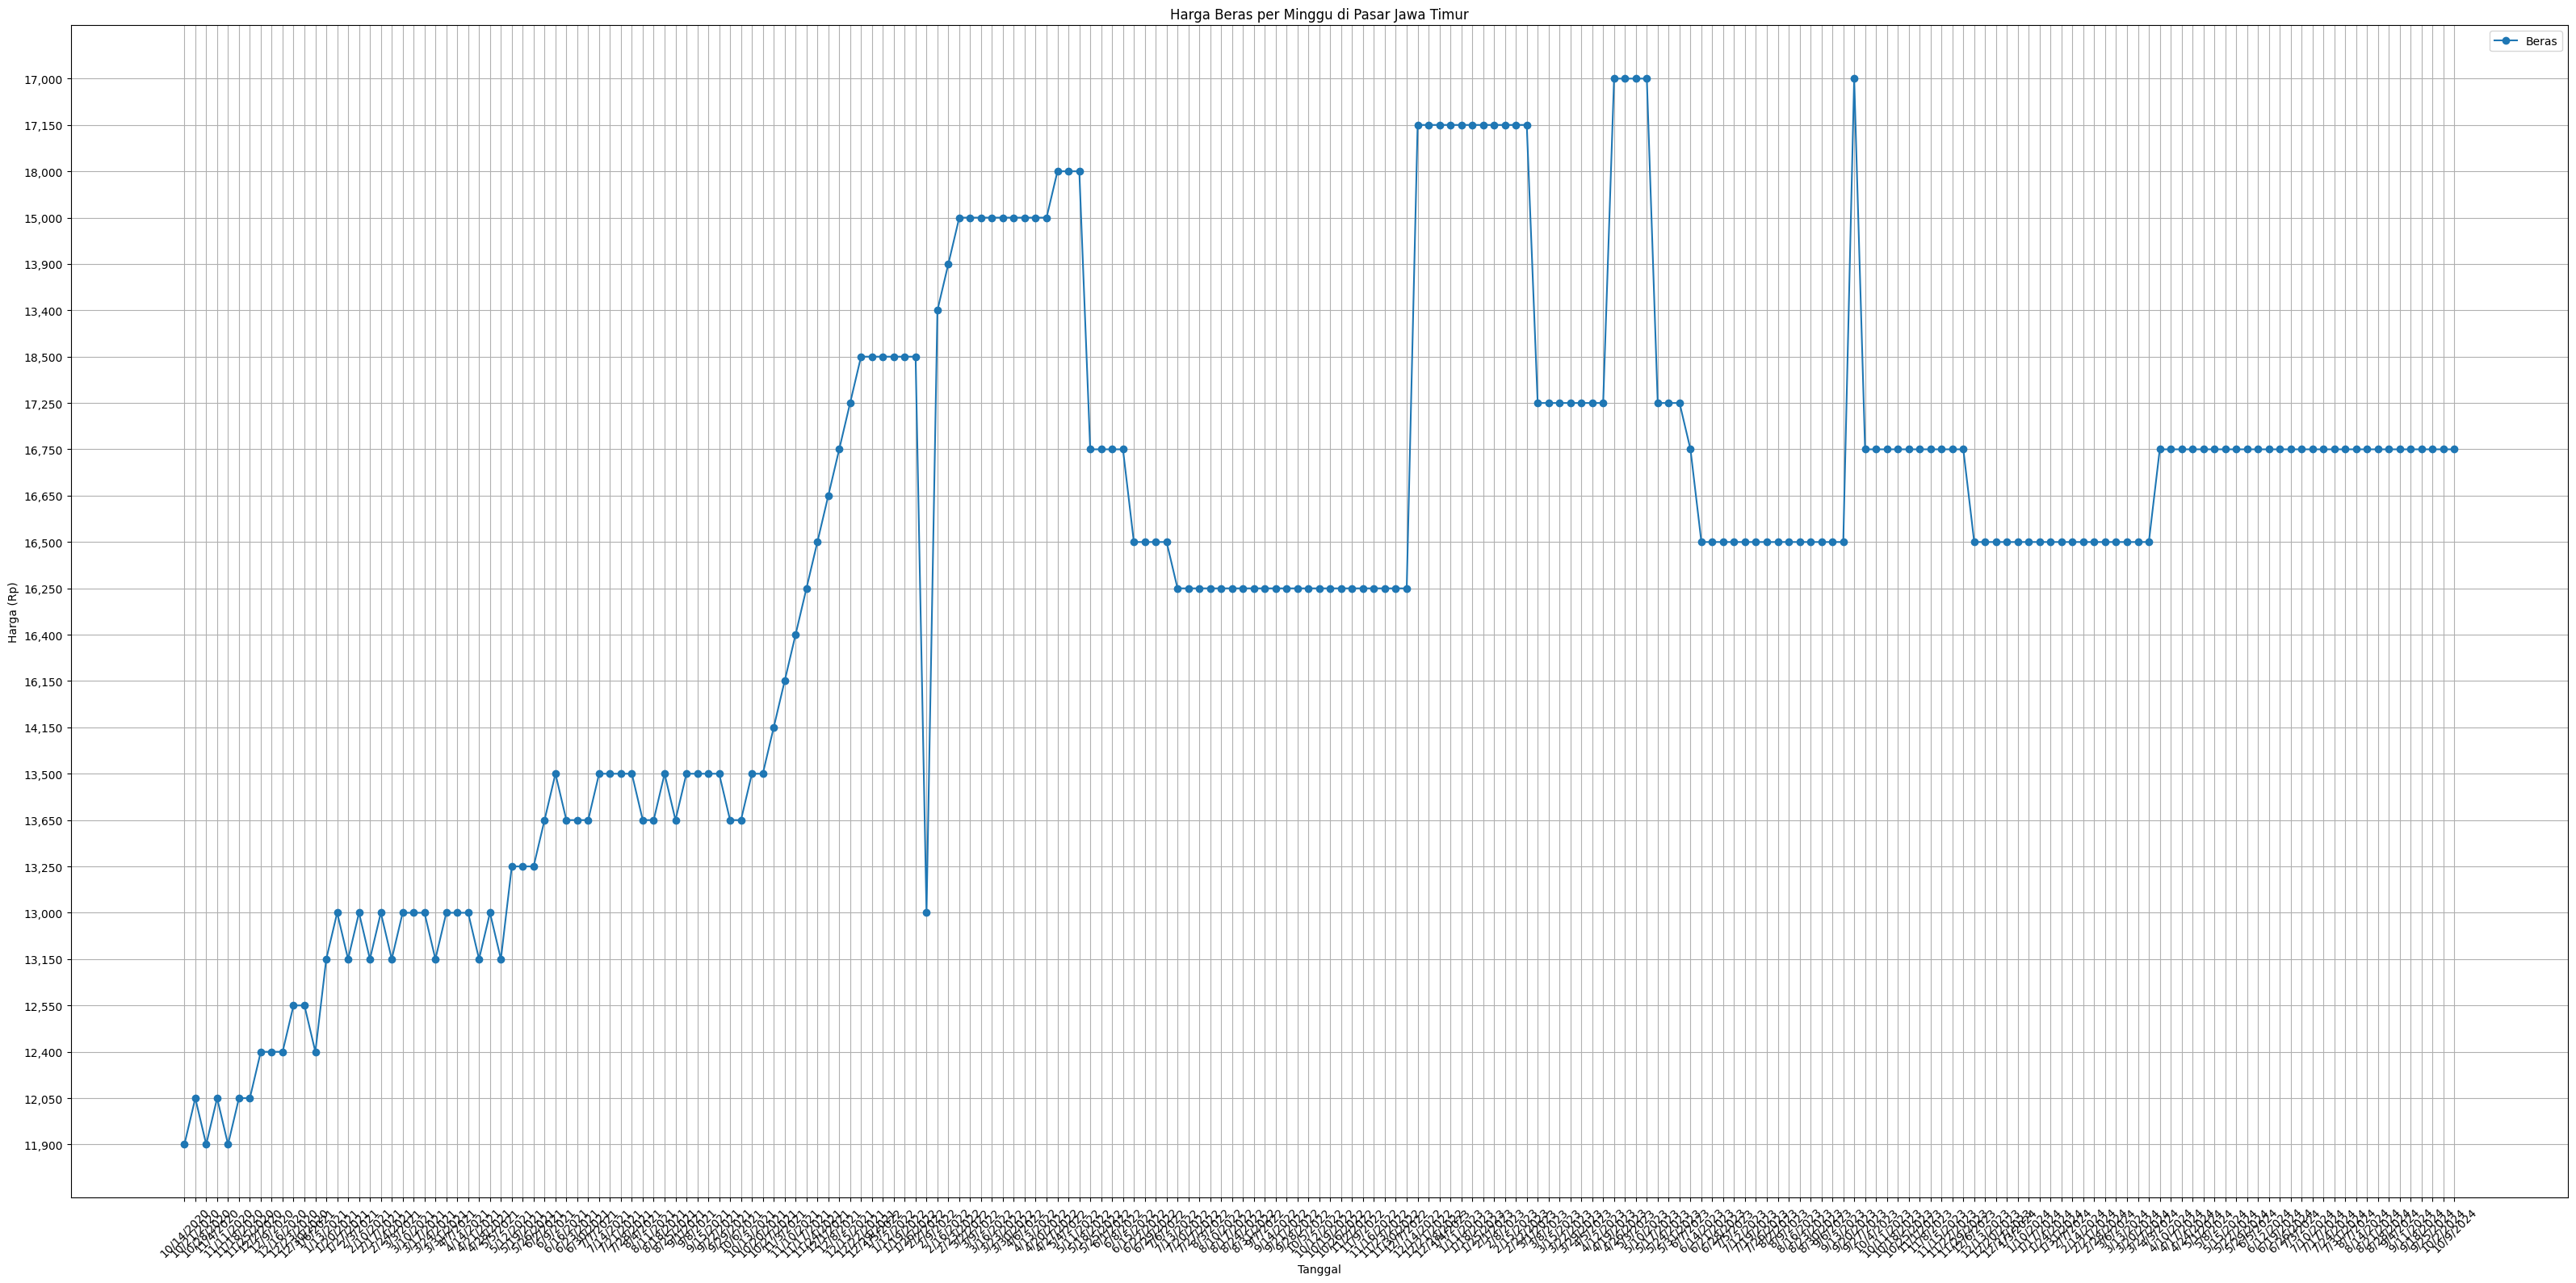

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Baca file CSV
df = pd.read_csv('minyak_many.csv')
# Membuat plot dengan matplotlib
# plt.figure(figsize=(16 ,8))
plt.figure(figsize=(32 ,16))
plt.plot(df['Date'], df['minggu'], marker='o', label='Beras')
# Menambahkan judul dan label sumbu
plt.title('Harga Beras per Minggu di Pasar Jawa Timur')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
# Menampilkan plot
plt.tight_layout()
plt.show()
data=df

### STRUKTUR DATASET

Dataset ini merupakan dataset dengan tipe time series, sehingga tidak ada label seperti yang umumnya ditemukan pada dataset klasifikasi atau regresi. Dalam konteks time series, data diorganisasikan berdasarkan urutan waktu, dan setiap entri biasanya mewakili pengamatan pada titik waktu tertentu.
Karena tidak ada label,time series pada dataset ini hanya terdiri dari:
* **Waktu** waktu tertentu dalam data
* **minyak curah** yang menunjukkan harga minyak curah pada waktu tertentu

struktur dataset perlu kita ketahui juga untuk mengelola data nantinya,kita perlu megetahui apakah ada berapa data pada dataset,dan ada berapa fitur juga.Karena data dan fitur akan sangat berhubungan dengan model yang akan kita buat nantinya.berikut cara untuk mengetahui struktur data dan penjelasannya.

In [2]:
df.shape

(209, 2)

In [3]:
df.columns

Index(['Date', 'minggu'], dtype='object')

Penjelasan lebih lengkapnya:
* **Waktu** merupakan waktu pada data timeseries yang memiliki rentang 7 hari atau satu minggu antar data sehingga dapat dikatakan bahwa data time series ini merupakan data time series mingguan
* **minggu** Merupakan harga minyak curah pada waktu tertentu ,harga minyak curah ini merupkan target yang akan kita prediksi nantinya.

In [4]:
print(df.describe())

              Date  minggu
count          209     209
unique         209      24
top     10/14/2020  16,750
freq             1      44


### IDENTIFIKASI KUALITAS DATA

### PENDETEKSIAN MISSING VALUE

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :
* Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan
* Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.
* Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

In [5]:

df['Date'] = pd.to_datetime(df['Date'])

# Mendeteksi missing value
missing_values = df.isnull()

# Menghitung jumlah missing value di setiap kolom
missing_count = df.isnull().sum()

# Menampilkan hasil
print("Missing value detection:\n", missing_values)
print("\nJumlah missing value per kolom:\n", missing_count)


Missing value detection:
       Date  minggu
0    False   False
1    False   False
2    False   False
3    False   False
4    False   False
..     ...     ...
204  False   False
205  False   False
206  False   False
207  False   False
208  False   False

[209 rows x 2 columns]

Jumlah missing value per kolom:
 Date      0
minggu    0
dtype: int64


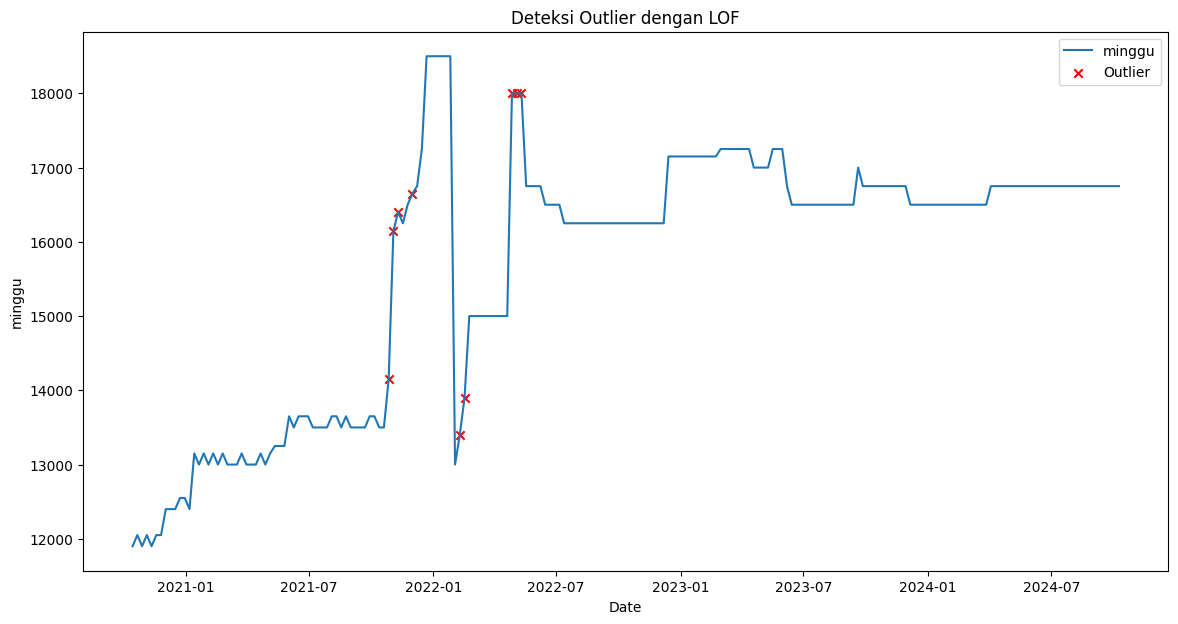

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Baca file CSV
df = pd.read_csv('minyak_many.csv')

# Konversi kolom 'Date' ke tipe datetime dan set sebagai index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Bersihkan data kolom 'minggu' dengan menghapus koma dan ubah ke tipe float
df['minggu'] = df['minggu'].str.replace(',', '').astype(float)

# Inisialisasi dan jalankan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
df['outlier'] = lof.fit_predict(df[['minggu']])

# Tandai outlier dalam kolom baru
df['outlier'] = np.where(df['outlier'] == -1, True, False)

# Hapus data yang merupakan outlier
df_cleaned = df[~df['outlier']].drop(columns='outlier')

# Simpan data yang telah dibersihkan ke file baru
df_cleaned.to_csv('minyak_cleaned.csv')

# Visualisasi data dengan outlier
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['minggu'], label='minggu')
plt.scatter(df.index[df['outlier']], df['minggu'][df['outlier']], color='red', label='Outlier', marker='x')
plt.title('Deteksi Outlier dengan LOF')
plt.xlabel('Date')
plt.ylabel('minggu')
plt.legend()
plt.show()


### Sliding Windows


In [ ]:
df = pd.read_csv('minyak_cleaned.csv')  # Membaca file
df['minggu'] = df['minggu'].str.replace(',', '').astype(float)  # Menghilangkan tanda koma  dan mengonversinya menjadi tipe data float
df['Date'] = pd.to_datetime(df['Date'])  # Mengonversi kolom 'Date' menjadi tipe datetime 
df.set_index('Date', inplace=True)  # Menjadikan kolom 'Date' sebagai indeks DataFrame
m_past = 3  # Menetapkan jumlah sliding windows
sliding_windows = []  
for i in range(len(df) - m_past):  #pemrosesan menjadi sliding windows
    window = df['minggu'].iloc[i:i + m_past + 1].values 
    Date = df.index[i + m_past]  
    sliding_windows.append([Date] + window.tolist())  
sliding_windows_df = pd.DataFrame(sliding_windows, columns=['Date'] + [f'minggu-{j}' for j in range(m_past, 0, -1)] + ['minggu'])
# Menyimpan DataFrame hasil sliding window ke file CSV
sliding_windows_df.to_csv('sliding_windows.csv', index=False)
print(sliding_windows_df)

          Date  minggu-3  minggu-2  minggu-1   minggu
0   2020-11-04   11900.0   12050.0   11900.0  12050.0
1   2020-11-11   12050.0   11900.0   12050.0  11900.0
2   2020-11-18   11900.0   12050.0   11900.0  12050.0
3   2020-11-25   12050.0   11900.0   12050.0  12050.0
4   2020-12-02   11900.0   12050.0   12050.0  12400.0
..         ...       ...       ...       ...      ...
201 2024-09-11   16750.0   16750.0   16750.0  16750.0
202 2024-09-18   16750.0   16750.0   16750.0  16750.0
203 2024-09-25   16750.0   16750.0   16750.0  16750.0
204 2024-10-02   16750.0   16750.0   16750.0  16750.0
205 2024-10-09   16750.0   16750.0   16750.0  16750.0

[206 rows x 5 columns]


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Baca file CSV
df = pd.read_csv('sliding_windows.csv')

# Pisahkan fitur dan target
X = df[['minggu-3', 'minggu-2', 'minggu-1']]
y = df['minggu']

# Bagi data menjadi data train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Inisialisasi scaler terpisah untuk X dan y, dan lakukan fitting hanya pada data train
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Normalisasi data test menggunakan parameter dari data train
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Konversi hasil normalisasi kembali ke DataFrame agar lebih mudah dibaca
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
y_train_scaled = pd.Series(y_train_scaled.flatten(), index=y_train.index, name='minggu')
y_test_scaled = pd.Series(y_test_scaled.flatten(), index=y_test.index, name='minggu')

# Gabungkan fitur dan target untuk train dan test
train_data = pd.concat([X_train_scaled, y_train_scaled], axis=1)
test_data = pd.concat([X_test_scaled, y_test_scaled], axis=1)

# Simpan data train dan test ke file CSV
train_data.to_csv('train_data_normalized.csv', index=True)
test_data.to_csv('test_data_normalized.csv', index=True)

print("Data train dan test yang sudah dinormalisasi telah disimpan ke file CSV.")


Data train dan test yang sudah dinormalisasi telah disimpan ke file CSV.


## MODELLING DENGAN REGRESI LINIER

Mean Absolute Percentage Error (MAPE):
Jika nilai MAPE kurang dari 10% maka kemampuan model peramalan sangat baik.
Jika nilai MAPE antara 10% - 20% maka kemampuan model peramalan baik.
Jika nilai MAPE kisaran 20% - 50% maka kemampuan model peramalan layak.
Root Mean Squared Error (RMSE):
semakin mendekati 0 semakin bagus
 

Mean Squared Error (MSE): 8.789001620056902e-05
Root Mean Squared Error (RMSE): 0.009374967530640788
Mean Absolute Percentage Error (MAPE): 0.010305613091575502 %
Predicted value for next week (normalized scale): 0.6924134430356987
Predicted value for next week (original scale): 16469.92872403561


c:\Users\men\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


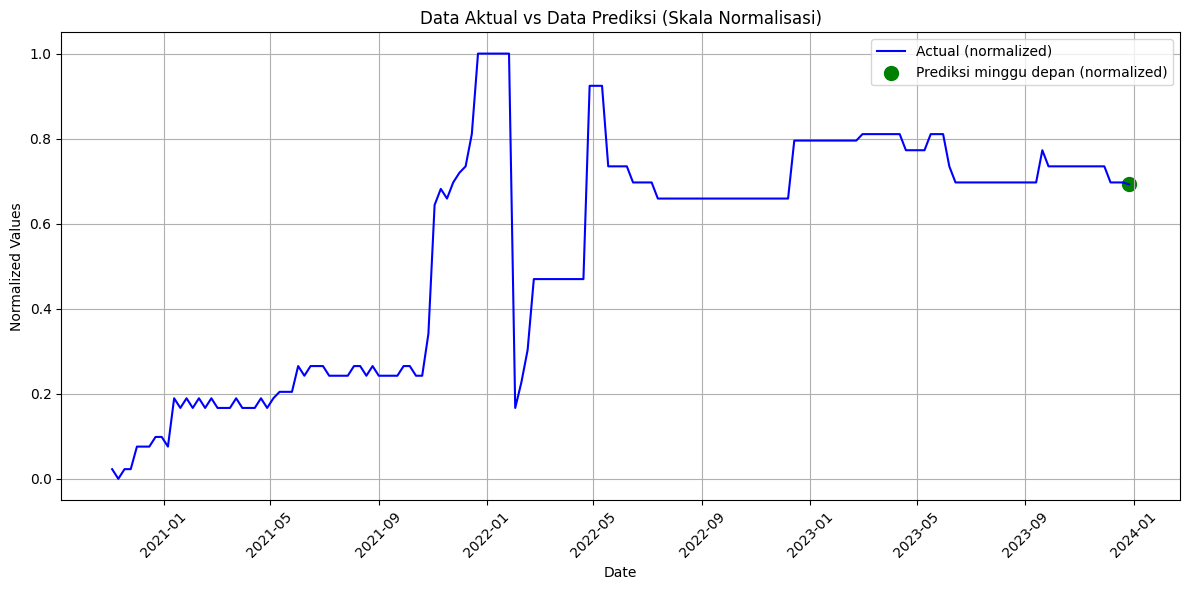

Prediksi nilai minggu depan (harga asli): 16469.92872403561


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle  # Library untuk menyimpan model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

# Baca file original untuk mendapatkan kolom Date dan nilai asli
original_df = pd.read_csv('sliding_windows.csv')
original_df['Date'] = pd.to_datetime(original_df['Date'])

# Baca data train dan test yang sudah dinormalisasi
train_data = pd.read_csv('train_data_normalized.csv', index_col=0)
test_data = pd.read_csv('test_data_normalized.csv', index_col=0)

# Tambahkan kolom Date ke train_data dan test_data berdasarkan indeks mereka
train_data['Date'] = original_df['Date'].iloc[:len(train_data)].values
test_data['Date'] = original_df['Date'].iloc[len(train_data):].values

# Pisahkan fitur dan target dari data train dan test
X_train = train_data[['minggu-1', 'minggu-2', 'minggu-3']]
y_train = train_data['minggu']
X_test = test_data[['minggu-1', 'minggu-2', 'minggu-3']]
y_test = test_data['minggu']

# Inisialisasi dan training model
model = LinearRegression()
model.fit(X_train, y_train)


# Prediksi dan evaluasi model pada data test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# Prediksi untuk minggu berikutnya menggunakan data terbaru dari data train
last_data = train_data.iloc[-1][['minggu-1', 'minggu-2', 'minggu-3']].values.reshape(1, -1)
predicted_value = model.predict(last_data)
print("Predicted value for next week (normalized scale):", predicted_value[0])

# Inisialisasi MinMaxScaler dan fit pada kolom 'minggu' dari original_df untuk mendapatkan skala asli
scaler = MinMaxScaler()
scaler.fit(original_df[['minggu']])

# Balikkan prediksi ke skala asli
predicted_value_original = scaler.inverse_transform([[predicted_value[0]]])[0][0]
print("Predicted value for next week (original scale):", predicted_value_original)

# Mendapatkan tanggal terakhir dari data train dan menambah satu minggu untuk prediksi
predicted_date = train_data['Date'].iloc[-1] + pd.Timedelta(weeks=1)
predicted_row = pd.DataFrame({
    'Date': [predicted_date],
    'minggu-1': last_data[0][0],
    'minggu-2': last_data[0][1],
    'minggu-3': last_data[0][2],
    'minggu': predicted_value[0]
})

# Menambahkan baris prediksi ke DataFrame yang dinormalisasi
normalized_df = pd.concat([train_data, predicted_row], ignore_index=True)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(normalized_df['Date'], normalized_df['minggu'], label='Actual (normalized)', color='blue')
plt.scatter(predicted_row['Date'], predicted_row['minggu'], label='Prediksi minggu depan (normalized)', color='green', s=100)
plt.title('Data Aktual vs Data Prediksi (Skala Normalisasi)')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Informasi tambahan tentang nilai asli prediksi minggu depan
print(f"Prediksi nilai minggu depan (harga asli): {predicted_value_original}")


In [47]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Baca data asli
original_df = pd.read_csv('sliding_windows.csv')
original_df['Date'] = pd.to_datetime(original_df['Date'])

# Siapkan fitur dan target
features = original_df[['minggu-1', 'minggu-2', 'minggu-3']]
target = original_df['minggu']  # Target kolom

# Inisialisasi scaler pada fitur saja dan fit scaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Pisahkan data ke dalam train dan test
train_size = int(0.8 * len(features))
X_train = normalized_features[:train_size]  # Fitur yang sudah dinormalisasi
X_test = normalized_features[train_size:]
y_train = target[:train_size].values  # Target tanpa normalisasi
y_test = target[train_size:].values

# Inisialisasi dan training model
model = LinearRegression()
model.fit(X_train, y_train)

# Simpan model dan scaler ke dalam file .pkl
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model dan scaler berhasil disimpan.")


Model dan scaler berhasil disimpan.


In [ ]:
import numpy as np
import pickle

with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

new_data = np.array([[10000,10500,11000]]) 

normalized_new_data = loaded_scaler.transform(new_data)


prediction = loaded_model.predict(normalized_new_data)

print(f"Prediction for the new data: {prediction}")


Prediction for the new data: [10346.88863191]


c:\Users\men\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## mencoba menggunakan model lain(LSTM)

Epoch 1/100


c:\Users\men\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.4472 - val_loss: 0.5665
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3913 - val_loss: 0.5335
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3597 - val_loss: 0.5019
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3559 - val_loss: 0.4685
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3282 - val_loss: 0.4345
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3031 - val_loss: 0.4001
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2910 - val_loss: 0.3667
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2368 - val_loss: 0.3328
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2395 - val_loss: 0.2979
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2021 - val_loss: 0.2626
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1792 - val_loss: 0.2270
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1544 - val_loss: 0.1922
E

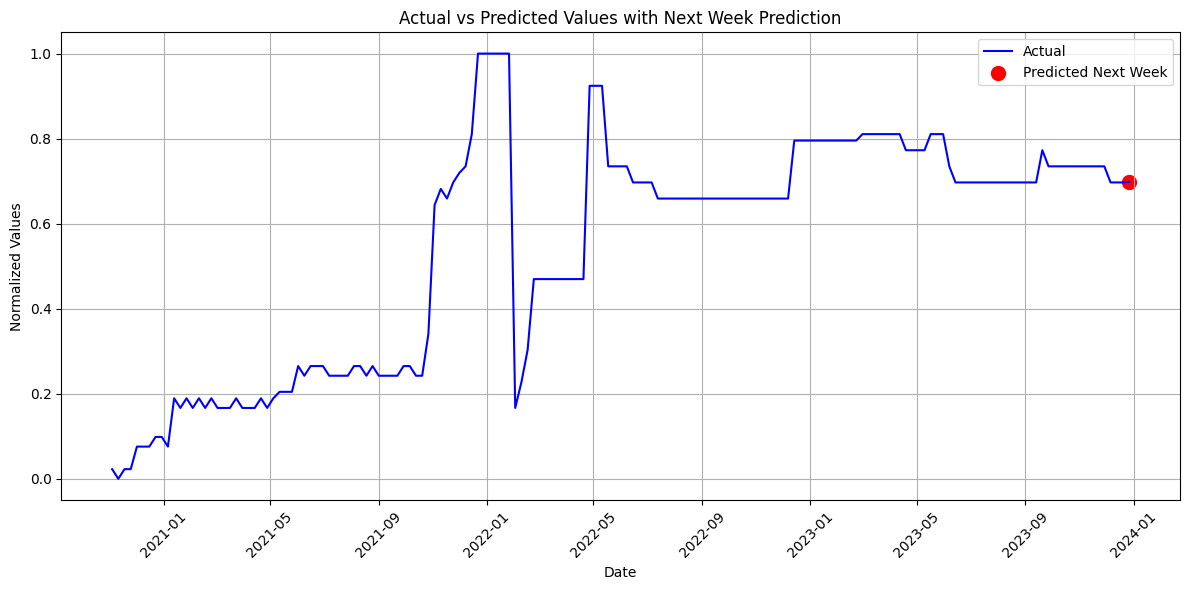

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Baca file original untuk mendapatkan kolom Date dan nilai asli
original_df = pd.read_csv('sliding_windows.csv')
original_df['Date'] = pd.to_datetime(original_df['Date'])

# Baca data train dan test yang sudah dinormalisasi
train_data = pd.read_csv('train_data_normalized.csv', index_col=0)
test_data = pd.read_csv('test_data_normalized.csv', index_col=0)

# Tambahkan kolom Date ke train_data dan test_data berdasarkan indeks mereka dari original_df
train_data['Date'] = original_df['Date'].iloc[:len(train_data)].values
test_data['Date'] = original_df['Date'].iloc[len(train_data):len(train_data) + len(test_data)].values

# Pisahkan fitur dan target dari data train dan test
X_train = train_data[['minggu-1', 'minggu-2', 'minggu-3']].values
y_train = train_data['minggu'].values
X_test = test_data[['minggu-1', 'minggu-2', 'minggu-3']].values
y_test = test_data['minggu'].values

# Reshape input untuk [samples, time steps, features] agar sesuai dengan input LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Definisikan model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Prediksi dan evaluasi pada data test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# Prediksi nilai minggu depan menggunakan data terakhir dari data train
last_data = train_data[['minggu-1', 'minggu-2', 'minggu-3']].values[-1].reshape(1, 1, -1)
predicted_value = model.predict(last_data)

# Inisialisasi MinMaxScaler dengan data asli untuk mengembalikan prediksi ke skala asli
scaler = MinMaxScaler()
scaler.fit(original_df[['minggu']])

# Balikkan prediksi ke harga asli
combined_data = np.concatenate((last_data.flatten().reshape(1, -1), predicted_value.reshape(1, 1)), axis=1)
predicted_value_original = scaler.inverse_transform(combined_data)
print("Predicted value for next week (original scale):", predicted_value_original[0][-1])

# Tambahkan prediksi minggu depan ke DataFrame untuk visualisasi
predicted_date = train_data['Date'].iloc[-1] + pd.Timedelta(weeks=1)
predicted_row = pd.DataFrame({
    'Date': [predicted_date],
    'minggu-1': [last_data[0][0][0]],
    'minggu-2': [last_data[0][0][1]],
    'minggu-3': [last_data[0][0][2]],
    'minggu': predicted_value[0][0]
})
train_data = pd.concat([train_data, predicted_row], ignore_index=True)

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['minggu'], label='Actual', color='blue')
plt.scatter(predicted_row['Date'], predicted_row['minggu'], label='Predicted Next Week', color='red', s=100)
plt.title('Actual vs Predicted Values with Next Week Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Regresi linier dengan ensemble begging


Mean Squared Error: 0.01775639033735343
Root Mean Squared Error: 0.13325310629532594
Mean Absolute Percentage Error (MAPE): 0.18665373923223758 %
Predicted value for next week (original scale): 16766.20654698054


c:\Users\men\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


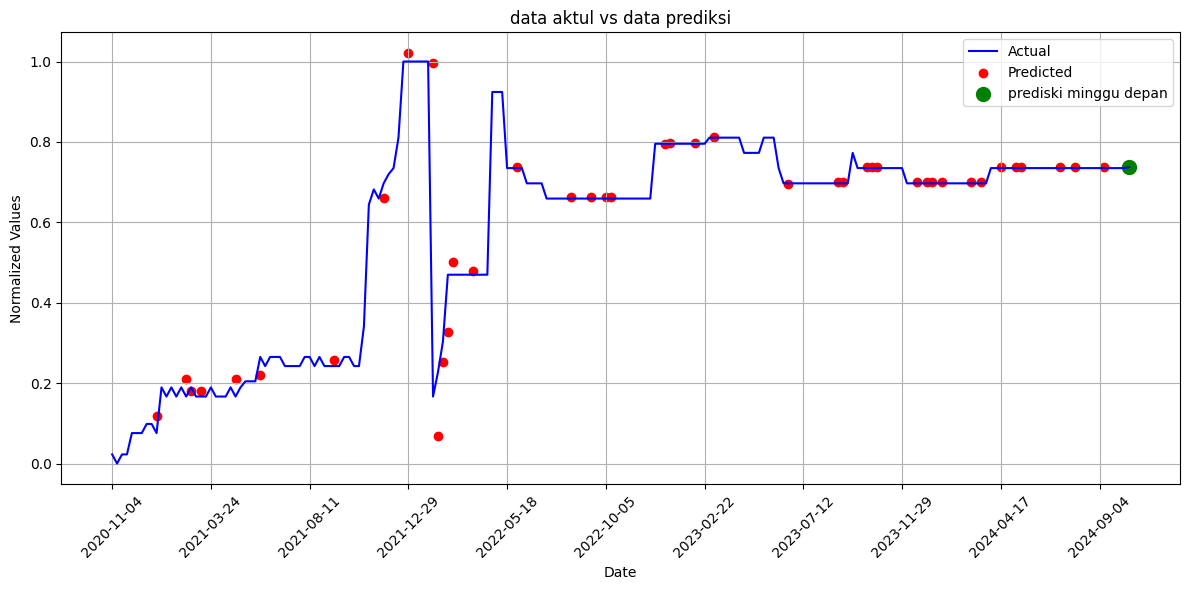

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingRegressor


df = pd.read_csv('sliding_windows.csv')

df['Date'] = pd.to_datetime(df['Date'])
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(df[['minggu-1', 'minggu-2', 'minggu-3', 'minggu']])

normalized_df = pd.DataFrame(normalized_values, columns=['minggu-1', 'minggu-2', 'minggu-3', 'minggu'])
normalized_df['Date'] = df['Date']

X = normalized_df[['minggu-1', 'minggu-2', 'minggu-3']]
y = normalized_df['minggu']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_model = LinearRegression()
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=10, bootstrap=True)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')

last_data = normalized_df.iloc[-1][['minggu-1', 'minggu-2', 'minggu-3']].values.reshape(1, -1)

predicted_value = bagging_model.predict(last_data)

combined_data = np.concatenate((last_data.flatten().reshape(1, -1), predicted_value.reshape(1, 1)), axis=1)

predicted_value_original = scaler.inverse_transform(combined_data)

print("Predicted value for next week (original scale):", predicted_value_original[0][-1])

predicted_date = normalized_df['Date'].iloc[-1] + pd.Timedelta(weeks=1)  
predicted_row = pd.DataFrame({'Date': [predicted_date], 
                              'minggu-1': last_data[0][0], 
                              'minggu-2': last_data[0][1], 
                              'minggu-3': last_data[0][2], 
                              'minggu': predicted_value[0]})

normalized_df = pd.concat([normalized_df, predicted_row], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.plot(normalized_df['Date'], normalized_df['minggu'], label='Actual', color='blue')
plt.scatter(normalized_df.loc[X_test.index, 'Date'], y_pred, label='Predicted', color='red')
plt.scatter(predicted_row['Date'], predicted_row['minggu'], label='prediski minggu depan', color='green', s=100)  

plt.title('data aktul vs data prediksi')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)

plt.xticks(normalized_df['Date'][::len(normalized_df)//10], rotation=45)  

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Grid Search


In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
import tensorflow as tf
def grid_search(input_df, target_df, splits, estimators, bootstrap, max_samples):

    best_rmse = float('inf')
    best_params = None
    i = 0
    for split in splits:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        for estimator in estimators:
            for bootstrap in bootstraps:
                for max_sample in max_samples:
                    base_model = LinearRegression()
                    bagging_model = BaggingRegressor(estimator=base_model, n_estimators=estimator, bootstrap=bootstrap, max_samples=max_sample)
                    bagging_model.fit(X_train, y_train.values.ravel())
                    y_pred = bagging_model.predict(X_test)
                    i+=1
                    current_rmse = rmse(y_test, y_pred)
                    print(f'Model {i} split: {split}, estimator: {estimator}, bootstrap: {bootstrap}, max sample: {max_sample}, RMSE: {current_rmse}')
                    if current_rmse < best_rmse:
                        best_rmse = current_rmse
                        best_model = bagging_model
                        best_params = {'estimator': estimator, 'bootstrap': bootstrap, 'train_sample': split, 'max_sample': max_sample}
                    tf.keras.backend.clear_session()
    return best_params, best_rmse, best_model

# Parameter untuk Grid Search
splits = [0.7, 0.75, 0.8, 0.85, 0.9]
estimators = [10, 20, 50, 100]
bootstraps = [True, False]
max_samples = [0.8, 0.9, 1.0]

best_params, best_rmse, best_model = grid_search(X, y, splits, estimators, bootstraps, max_samples)

Model 1 split: 0.7, estimator: 10, bootstrap: True, max sample: 0.8, RMSE: 0.13209272020721333

Model 2 split: 0.7, estimator: 10, bootstrap: True, max sample: 0.9, RMSE: 0.13290502586691075
Model 3 split: 0.7, estimator: 10, bootstrap: True, max sample: 1.0, RMSE: 0.13289008117730217
Model 4 split: 0.7, estimator: 10, bootstrap: False, max sample: 0.8, RMSE: 0.13231846998453223
Model 5 split: 0.7, estimator: 10, bootstrap: False, max sample: 0.9, RMSE: 0.13260382183513605
Model 6 split: 0.7, estimator: 10, bootstrap: False, max sample: 1.0, RMSE: 0.1322743608458132
Model 7 split: 0.7, estimator: 20, bootstrap: True, max sample: 0.8, RMSE: 0.13341172145773594
Model 8 split: 0.7, estimator: 20, bootstrap: True, max sample: 0.9, RMSE: 0.13207095025220994
Model 9 split: 0.7, estimator: 20, bootstrap: True, max sample: 1.0, RMSE: 0.13316547466789894
Model 10 split: 0.7, estimator: 20, bootstrap: False, max sample: 0.8, RMSE: 0.13277887235932623
Model 11 split: 0.7, estimator: 20, bootstrap

In [11]:
# Parameter terbaik
print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')
print(f'Best model: {best_model}')

Best parameters: {'estimator': 10, 'bootstrap': True, 'train_sample': 0.9, 'max_sample': 1.0}
Best RMSE: 0.13161561895860976
Best model: BaggingRegressor(estimator=LinearRegression())


Mean Squared Error: 0.017657262890701908
Root Mean Squared Error: 0.13288063399420513
Mean Absolute Percentage Error (MAPE): 0.18240985761983564 %
Predicted value for next week (original scale): 16766.441118496594


c:\Users\men\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


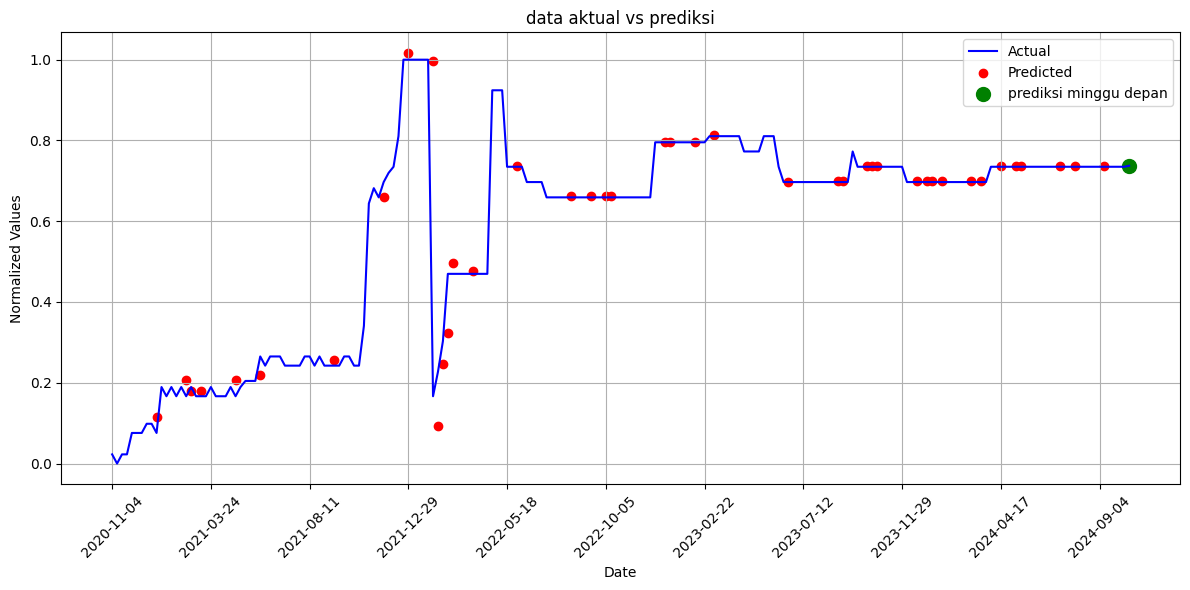

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingRegressor

df = pd.read_csv('sliding_windows.csv')

df['Date'] = pd.to_datetime(df['Date'])

scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(df[['minggu-1', 'minggu-2', 'minggu-3', 'minggu']])

normalized_df = pd.DataFrame(normalized_values, columns=['minggu-1', 'minggu-2', 'minggu-3', 'minggu'])
normalized_df['Date'] = df['Date']

X = normalized_df[['minggu-1', 'minggu-2', 'minggu-3']]
y = normalized_df['minggu']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = LinearRegression()
bagging_model = best_model


bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')

last_data = normalized_df.iloc[-1][['minggu-1', 'minggu-2', 'minggu-3']].values.reshape(1, -1)

predicted_value = bagging_model.predict(last_data)

combined_data = np.concatenate((last_data.flatten().reshape(1, -1), predicted_value.reshape(1, 1)), axis=1)

predicted_value_original = scaler.inverse_transform(combined_data)

print("Predicted value for next week (original scale):", predicted_value_original[0][-1])

predicted_date = normalized_df['Date'].iloc[-1] + pd.Timedelta(weeks=1) 
predicted_row = pd.DataFrame({'Date': [predicted_date], 
                              'minggu-1': last_data[0][0], 
                              'minggu-2': last_data[0][1], 
                              'minggu-3': last_data[0][2], 
                              'minggu': predicted_value[0]})
normalized_df = pd.concat([normalized_df, predicted_row], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.plot(normalized_df['Date'], normalized_df['minggu'], label='Actual', color='blue')
plt.scatter(normalized_df.loc[X_test.index, 'Date'], y_pred, label='Predicted', color='red')
plt.scatter(predicted_row['Date'], predicted_row['minggu'], label='prediksi minggu depan', color='green', s=100)  

plt.title('data aktual vs prediksi')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.xticks(normalized_df['Date'][::len(normalized_df)//10], rotation=45) 

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
